In [0]:
%tensorflow_version 2.x  # this line is not required unless you are in a notebook
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.x  # this line is not required unless you are in a notebook`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.


In [0]:
fashion_mnist =  keras.datasets.fashion_mnist #load dataset

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
X_train.shape

(60000, 28, 28)

In [0]:
# Lets have a look at one pixel

X_train[0,24,24]

99

In [0]:
# Lets have a look at first 10 training labels

y_train[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

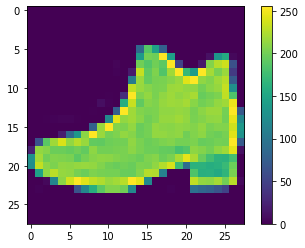

In [0]:
# Visualizing the image

plt.figure()
plt.imshow(X_train[15])
plt.colorbar()
plt.grid(False)
plt.show()

## Data Preprocessing

In [0]:
X_train = X_train/255.0

X_test = X_test/255.0

## Building the Model

In [0]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation = "relu"),
    keras.layers.Dense(10, activation = "softmax")                       
])

## Compile the model

In [0]:
model.compile(optimizer="adam", loss = "sparse_categorical_crossentropy", metrics= ["accuracy"])

## Training The Model

In [0]:
model.fit(X_train, y_train, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4968 - accuracy: 0.8267
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3761 - accuracy: 0.8650
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3393 - accuracy: 0.8758
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3140 - accuracy: 0.8852
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2948 - accuracy: 0.8917
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2824 - accuracy: 0.8954
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2685 - accuracy: 0.8995
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2607 - accuracy: 0.9021
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2501 - accuracy: 0.9072
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.240

## Evaluating The Model

In [0]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose = 1)

313/313 [==============================] - 0s 1ms/step - loss: 0.3356 - accuracy: 0.8825


- Large number of epochs can overfit the model

## Making Predictions

In [0]:
predictions = model.predict(X_test)

In [0]:
X_test.shape

(10000, 28, 28)

In [0]:
print(predictions)

[[4.1837835e-09 4.7723359e-10 1.0782460e-08 ... 9.3737161e-03
  9.4952100e-07 9.8997355e-01]
 [1.6874372e-05 9.1901847e-15 9.9988568e-01 ... 1.4129625e-14
  8.2214839e-11 5.7309661e-15]
 [6.4648411e-08 9.9999988e-01 1.4478795e-11 ... 1.8331410e-20
  1.5460346e-12 1.9578273e-18]
 ...
 [5.2648829e-06 4.3901816e-10 3.4431290e-05 ... 8.5116999e-14
  9.9936670e-01 2.2449822e-13]
 [2.4135211e-08 9.9999678e-01 1.6181700e-10 ... 4.7019114e-14
  9.6426513e-11 1.3113347e-13]
 [9.2316390e-05 3.3438941e-08 1.1771833e-05 ... 5.5158292e-03
  4.5936124e-04 5.0017668e-05]]


Bag


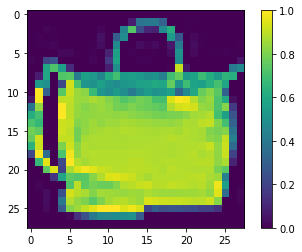

In [0]:
predictions = model.predict(X_test)
print(class_names[np.argmax(predictions[521])])
plt.figure()
plt.imshow(X_test[521])
plt.colorbar()
plt.grid(False)
plt.show()

## Verifying the predictions

Pick a number: 54


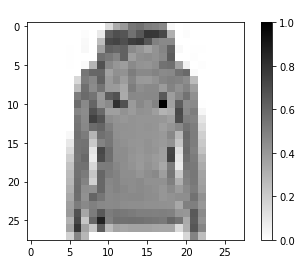

In [0]:
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model, image, correct_label):
  class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
  prediction = model.predict(np.array([image]))
  predicted_class = class_names[np.argmax(prediction)]

  show_image(image, class_names[correct_label], predicted_class)


def show_image(img, label, guess):
  plt.figure()
  plt.imshow(img, cmap=plt.cm.binary)
  plt.title("Excpected: " + label)
  plt.xlabel("Guess: " + guess)
  plt.colorbar()
  plt.grid(False)
  plt.show()


def get_number():
  while True:
    num = input("Pick a number: ")
    if num.isdigit():
      num = int(num)
      if 0 <= num <= 1000:
        return int(num)
    else:
      print("Try again...")

num = get_number()
image = X_test[num]
label = y_test[num]
predict(model, image, label)